In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
tweets=pd.read_csv("train.csv",encoding="latin-1")
test=tweets.sample(10)
test

,id,label,tweet
2995,2996,0,"not enuff urgency by #warriors, my nfl career ..."
20079,20080,0,"great pair of games tonight, can't wait for th..."
5439,5440,1,@user .@user @user tragic 4 white americans th...
24915,24916,0,ate all of my animal crackers and now i am
26584,26585,0,all prepped and ready for @user coaching. @use...
6224,6225,1,@user this sums up why i voted for #brexit; no...
5213,5214,0,love love love being surprised... but i love s...
12992,12993,0,"do your dance, grandma's #herbalofthemonth i..."
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 ...
9685,9686,1,b4 sm we didnt hear this latent every single ...


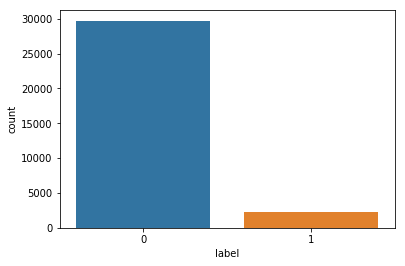

In [68]:
import seaborn as sns
sns.countplot(tweets.label)

In [4]:
import nltk

In [5]:
import nltk.corpus
import os

In [6]:
# removing stopwords:
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])
test["1"]=test.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [7]:
test

,id,label,tweet,1
2995,2996,0,"not enuff urgency by #warriors, my nfl career ...","enuff urgency #warriors, nfl career may sta da..."
20079,20080,0,"great pair of games tonight, can't wait for th...","great pair games tonight, can't wait next stag..."
5439,5440,1,@user .@user @user tragic 4 white americans th...,@user .@user @user tragic 4 white americans pr...
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers
26584,26585,0,all prepped and ready for @user coaching. @use...,prepped ready @user coaching. @user @user #exp...
6224,6225,1,@user this sums up why i voted for #brexit; no...,@user sums voted #brexit; #littleenglander syn...
5213,5214,0,love love love being surprised... but i love s...,love love love surprised... love surprising pe...
12992,12993,0,"do your dance, grandma's #herbalofthemonth i...","dance, grandma's #herbalofthemonth 50% off: #h..."
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 ...,bihday countdown: 8 days!!!!! #14 #almost14 Ã°...
9685,9686,1,b4 sm we didnt hear this latent every single ...,b4 sm didnt hear latent every single day..


In [8]:
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x


In [9]:
test["2"]=test["1"].apply(clean)

In [10]:
test

,id,label,tweet,1,2
2995,2996,0,"not enuff urgency by #warriors, my nfl career ...","enuff urgency #warriors, nfl career may sta da...",enuff urgency warriors nfl career may sta days...
20079,20080,0,"great pair of games tonight, can't wait for th...","great pair games tonight, can't wait next stag...",great pair games tonight can't wait next stage...
5439,5440,1,@user .@user @user tragic 4 white americans th...,@user .@user @user tragic 4 white americans pr...,user user tragic 4 white americans prompts man...
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers,ate animal crackers
26584,26585,0,all prepped and ready for @user coaching. @use...,prepped ready @user coaching. @user @user #exp...,prepped ready user coaching user user expectal...
6224,6225,1,@user this sums up why i voted for #brexit; no...,@user sums voted #brexit; #littleenglander syn...,sums voted brexit littleenglander syndrome sov...
5213,5214,0,love love love being surprised... but i love s...,love love love surprised... love surprising pe...,love love love surprised love surprising peopl...
12992,12993,0,"do your dance, grandma's #herbalofthemonth i...","dance, grandma's #herbalofthemonth 50% off: #h...",dance grandma's herbalofthemonth 50 off honeys...
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 ...,bihday countdown: 8 days!!!!! #14 #almost14 Ã°...,bihday countdown 8 days 14 almost14
9685,9686,1,b4 sm we didnt hear this latent every single ...,b4 sm didnt hear latent every single day..,b4 sm didnt hear latent every single day


In [11]:
# stemming
from nltk.stem.porter import *
ps=PorterStemmer()
test["3"]=test["2"].apply(lambda x:' '.join([ps.stem(word) for word in x.split()]))


In [12]:
pd.set_option('max_colwidth', 300)
test

,id,label,tweet,1,2,3
2995,2996,0,"not enuff urgency by #warriors, my nfl career may not sta for a few days yet...","enuff urgency #warriors, nfl career may sta days yet...",enuff urgency warriors nfl career may sta days yet,enuff urgenc warrior nfl career may sta day yet
20079,20080,0,"great pair of games tonight, can't wait for the next stage to begin on thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan","great pair games tonight, can't wait next stage begin thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan",great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair game tonight can't wait next stage begin thursday copaamerica argvbol chivpan
5439,5440,1,@user .@user @user tragic 4 white americans that prompts so many 2 vote 4 candidates who will slash their owÃ¢ÂÂ¦,@user .@user @user tragic 4 white americans prompts many 2 vote 4 candidates slash owÃ¢ÂÂ¦,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow,user user tragic 4 white american prompt mani 2 vote 4 candid slash ow
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers,ate animal crackers,ate anim cracker
26584,26585,0,all prepped and ready for @user coaching. @user @user #expectallweathers,prepped ready @user coaching. @user @user #expectallweathers,prepped ready user coaching user user expectallweathers,prep readi user coach user user expectallweath
6224,6225,1,@user this sums up why i voted for #brexit; not or #littleenglander syndrome but sovereignty and democracy,@user sums voted #brexit; #littleenglander syndrome sovereignty democracy,sums voted brexit littleenglander syndrome sovereignty democracy,sum vote brexit littleengland syndrom sovereignti democraci
5213,5214,0,love love love being surprised... but i love surprising people even more,love love love surprised... love surprising people even,love love love surprised love surprising people even,love love love surpris love surpris peopl even
12992,12993,0,"do your dance, grandma's #herbalofthemonth is 50% off: #honeysuckle","dance, grandma's #herbalofthemonth 50% off: #honeysuckle",dance grandma's herbalofthemonth 50 off honeysuckle,danc grandma' herbalofthemonth 50 off honeysuckl
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown 8 days 14 almost14,bihday countdown 8 day 14 almost14
9685,9686,1,b4 sm we didnt hear this latent every single day..,b4 sm didnt hear latent every single day..,b4 sm didnt hear latent every single day,b4 sm didnt hear latent everi singl day


In [13]:
# rennasaince is changed to rennais (stemming)

In [14]:
# rennasaince is changed to rennais (lemmatization)

In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
test["4"]=test["2"].apply(lambda x:' '.join([lmtzr.lemmatize(word,'v') for word in x.split()]))

In [16]:
test

,id,label,tweet,1,2,3,4
2995,2996,0,"not enuff urgency by #warriors, my nfl career may not sta for a few days yet...","enuff urgency #warriors, nfl career may sta days yet...",enuff urgency warriors nfl career may sta days yet,enuff urgenc warrior nfl career may sta day yet,enuff urgency warriors nfl career may sta days yet
20079,20080,0,"great pair of games tonight, can't wait for the next stage to begin on thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan","great pair games tonight, can't wait next stage begin thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan",great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair game tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair game tonight can't wait next stage begin thursday copaamerica argvbol chivpan
5439,5440,1,@user .@user @user tragic 4 white americans that prompts so many 2 vote 4 candidates who will slash their owÃ¢ÂÂ¦,@user .@user @user tragic 4 white americans prompts many 2 vote 4 candidates slash owÃ¢ÂÂ¦,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow,user user tragic 4 white american prompt mani 2 vote 4 candid slash ow,user user tragic 4 white americans prompt many 2 vote 4 candidates slash ow
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers,ate animal crackers,ate anim cracker,eat animal crackers
26584,26585,0,all prepped and ready for @user coaching. @user @user #expectallweathers,prepped ready @user coaching. @user @user #expectallweathers,prepped ready user coaching user user expectallweathers,prep readi user coach user user expectallweath,prepped ready user coach user user expectallweathers
6224,6225,1,@user this sums up why i voted for #brexit; not or #littleenglander syndrome but sovereignty and democracy,@user sums voted #brexit; #littleenglander syndrome sovereignty democracy,sums voted brexit littleenglander syndrome sovereignty democracy,sum vote brexit littleengland syndrom sovereignti democraci,sum vote brexit littleenglander syndrome sovereignty democracy
5213,5214,0,love love love being surprised... but i love surprising people even more,love love love surprised... love surprising people even,love love love surprised love surprising people even,love love love surpris love surpris peopl even,love love love surprise love surprise people even
12992,12993,0,"do your dance, grandma's #herbalofthemonth is 50% off: #honeysuckle","dance, grandma's #herbalofthemonth 50% off: #honeysuckle",dance grandma's herbalofthemonth 50 off honeysuckle,danc grandma' herbalofthemonth 50 off honeysuckl,dance grandma's herbalofthemonth 50 off honeysuckle
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown 8 days 14 almost14,bihday countdown 8 day 14 almost14,bihday countdown 8 days 14 almost14
9685,9686,1,b4 sm we didnt hear this latent every single day..,b4 sm didnt hear latent every single day..,b4 sm didnt hear latent every single day,b4 sm didnt hear latent everi singl day,b4 sm didnt hear latent every single day


In [17]:
test["4"]=test["2"].apply(lambda x:' '.join([word.lower() for word in x.split()]))

In [18]:
test

,id,label,tweet,1,2,3,4
2995,2996,0,"not enuff urgency by #warriors, my nfl career may not sta for a few days yet...","enuff urgency #warriors, nfl career may sta days yet...",enuff urgency warriors nfl career may sta days yet,enuff urgenc warrior nfl career may sta day yet,enuff urgency warriors nfl career may sta days yet
20079,20080,0,"great pair of games tonight, can't wait for the next stage to begin on thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan","great pair games tonight, can't wait next stage begin thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan",great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair game tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan
5439,5440,1,@user .@user @user tragic 4 white americans that prompts so many 2 vote 4 candidates who will slash their owÃ¢ÂÂ¦,@user .@user @user tragic 4 white americans prompts many 2 vote 4 candidates slash owÃ¢ÂÂ¦,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow,user user tragic 4 white american prompt mani 2 vote 4 candid slash ow,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers,ate animal crackers,ate anim cracker,ate animal crackers
26584,26585,0,all prepped and ready for @user coaching. @user @user #expectallweathers,prepped ready @user coaching. @user @user #expectallweathers,prepped ready user coaching user user expectallweathers,prep readi user coach user user expectallweath,prepped ready user coaching user user expectallweathers
6224,6225,1,@user this sums up why i voted for #brexit; not or #littleenglander syndrome but sovereignty and democracy,@user sums voted #brexit; #littleenglander syndrome sovereignty democracy,sums voted brexit littleenglander syndrome sovereignty democracy,sum vote brexit littleengland syndrom sovereignti democraci,sums voted brexit littleenglander syndrome sovereignty democracy
5213,5214,0,love love love being surprised... but i love surprising people even more,love love love surprised... love surprising people even,love love love surprised love surprising people even,love love love surpris love surpris peopl even,love love love surprised love surprising people even
12992,12993,0,"do your dance, grandma's #herbalofthemonth is 50% off: #honeysuckle","dance, grandma's #herbalofthemonth 50% off: #honeysuckle",dance grandma's herbalofthemonth 50 off honeysuckle,danc grandma' herbalofthemonth 50 off honeysuckl,dance grandma's herbalofthemonth 50 off honeysuckle
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown 8 days 14 almost14,bihday countdown 8 day 14 almost14,bihday countdown 8 days 14 almost14
9685,9686,1,b4 sm we didnt hear this latent every single day..,b4 sm didnt hear latent every single day..,b4 sm didnt hear latent every single day,b4 sm didnt hear latent everi singl day,b4 sm didnt hear latent every single day


In [19]:
test['5'] = test['2'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))

In [20]:
test

,id,label,tweet,1,2,3,4,5
2995,2996,0,"not enuff urgency by #warriors, my nfl career may not sta for a few days yet...","enuff urgency #warriors, nfl career may sta days yet...",enuff urgency warriors nfl career may sta days yet,enuff urgenc warrior nfl career may sta day yet,enuff urgency warriors nfl career may sta days yet,"[(enuff, NN), (urgency, NN), (warriors, NNS), (nfl, VBP), (career, NN), (may, MD), (sta, VB), (days, NNS), (yet, RB)]"
20079,20080,0,"great pair of games tonight, can't wait for the next stage to begin on thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan","great pair games tonight, can't wait next stage begin thursday!Ã¢ÂÂ½ #copaamerica #argvbol #chivpan",great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair game tonight can't wait next stage begin thursday copaamerica argvbol chivpan,great pair games tonight can't wait next stage begin thursday copaamerica argvbol chivpan,"[(great, JJ), (pair, NN), (games, NNS), (tonight, VBD), (ca, MD), (n't, RB), (wait, VB), (next, JJ), (stage, NN), (begin, NN), (thursday, NN), (copaamerica, VBP), (argvbol, NN), (chivpan, NN)]"
5439,5440,1,@user .@user @user tragic 4 white americans that prompts so many 2 vote 4 candidates who will slash their owÃ¢ÂÂ¦,@user .@user @user tragic 4 white americans prompts many 2 vote 4 candidates slash owÃ¢ÂÂ¦,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow,user user tragic 4 white american prompt mani 2 vote 4 candid slash ow,user user tragic 4 white americans prompts many 2 vote 4 candidates slash ow,"[(user, RB), (user, JJ), (tragic, JJ), (4, CD), (white, JJ), (americans, NNS), (prompts, VBP), (many, JJ), (2, CD), (vote, NN), (4, CD), (candidates, NNS), (slash, VBP), (ow, NN)]"
24915,24916,0,ate all of my animal crackers and now i am,ate animal crackers,ate animal crackers,ate anim cracker,ate animal crackers,"[(ate, NN), (animal, NN), (crackers, NNS)]"
26584,26585,0,all prepped and ready for @user coaching. @user @user #expectallweathers,prepped ready @user coaching. @user @user #expectallweathers,prepped ready user coaching user user expectallweathers,prep readi user coach user user expectallweath,prepped ready user coaching user user expectallweathers,"[(prepped, VBN), (ready, JJ), (user, NN), (coaching, VBG), (user, JJ), (user, NN), (expectallweathers, NNS)]"
6224,6225,1,@user this sums up why i voted for #brexit; not or #littleenglander syndrome but sovereignty and democracy,@user sums voted #brexit; #littleenglander syndrome sovereignty democracy,sums voted brexit littleenglander syndrome sovereignty democracy,sum vote brexit littleengland syndrom sovereignti democraci,sums voted brexit littleenglander syndrome sovereignty democracy,"[(sums, NNS), (voted, VBD), (brexit, NN), (littleenglander, NN), (syndrome, JJ), (sovereignty, NN), (democracy, NN)]"
5213,5214,0,love love love being surprised... but i love surprising people even more,love love love surprised... love surprising people even,love love love surprised love surprising people even,love love love surpris love surpris peopl even,love love love surprised love surprising people even,"[(love, VB), (love, NN), (love, NN), (surprised, VBD), (love, VB), (surprising, JJ), (people, NNS), (even, RB)]"
12992,12993,0,"do your dance, grandma's #herbalofthemonth is 50% off: #honeysuckle","dance, grandma's #herbalofthemonth 50% off: #honeysuckle",dance grandma's herbalofthemonth 50 off honeysuckle,danc grandma' herbalofthemonth 50 off honeysuckl,dance grandma's herbalofthemonth 50 off honeysuckle,"[(dance, NN), (grandma, NN), ('s, POS), (herbalofthemonth, JJ), (50, CD), (off, IN), (honeysuckle, NN)]"
15292,15293,0,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown: 8 days!!!!! #14 #almost14 Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ,bihday countdown 8 days 14 almost14,bihday countdown 8 day 14 almost14,bihday countdown 8 days 14 almost14,"[(bihday, RB), (countdown, JJ), (8, CD), (days, NNS), (1

# Implementation

In [21]:
tweets.tweet=tweets.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
# removing special characters: hyperlinks and mentions:

tweets.tweet=tweets.tweet.apply(clean)

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([lmtzr.lemmatize(word,'v') for word in x.split()]))

In [24]:
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

In [25]:
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunction run
1,2,0,user thank lyft credit can't use cause offer wheelchair vans pdx disapointed getthanked
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv=CountVectorizer()

In [28]:
wcv=cv.fit(tweets.tweet)

In [29]:
wcv.get_feature_names()

['00',
 '000',
 '000001',
 '001',
 '008',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '061016ev',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happysongs',
 '100k',
 '100ml',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',
 '10hrs',
 '10k',
 '10kday',
 '10kms',
 '10m',
 '10meses',

In [30]:
# transforming the data:
d_arr=wcv.transform(tweets.tweet).toarray()
d_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
pd.DataFrame(d_arr)

,0,1,2,3,4,5,6,7,8,9,...,35855,35856,35857,35858,35859,35860,35861,35862,35863,35864
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
feature_matrix=pd.DataFrame(d_arr,columns=wcv.get_feature_names())
feature_matrix

,00,000,000001,001,008,0099,00am,00h30,00pm,01,...,zulu,zuma,zumba,zurich,zx,zydeco,zz,zzz,zzzzzz,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.naive_bayes import BernoulliNB

model_BernNB = BernoulliNB()

In [34]:
# TFIDF Vectorizer

# Import TfIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize and object for the TFIDF Vectorizer
tf= TfidfVectorizer()

In [35]:
y=tweets.label

In [36]:
xt=tf.fit_transform(tweets.tweet)

In [37]:
xt.shape

(31962, 35865)

## Multinomial Bayes implementation

In [38]:
from sklearn import naive_bayes

In [39]:
clf=naive_bayes.MultinomialNB()

In [40]:
clf.fit(xt,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
ytp=clf.predict(xt)       # training input transformed

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
accuracy_score(y,ytp)   # accuracy on training

0.9444965897002691

In [44]:
confusion_matrix(y,ytp)   #confusion matrix on training

array([[29719,     1],
       [ 1773,   469]], dtype=int64)

In [45]:
result=pd.read_csv("result.csv")
result.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [46]:
X_test=pd.read_csv("test.csv")
X_test.head()                # testing input

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [47]:
result.shape               # test data output

(17197, 2)

In [48]:
X_test.shape             

(17197, 2)

In [49]:
Xtt=tf.transform(X_test.tweet)            #transformed test data

In [50]:
y_test=clf.predict(Xtt)
y_test.shape                  # Multinomial model predictions

(17197,)

In [51]:
y1=result.label

In [72]:
accuracy_score(y1,y_test)           # multinomial NB test data accuracy

0.9523172646391812

In [75]:
from sklearn.metrics import classification_report,recall_score
print(classification_report(y1,y_test))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98     16282
          1       0.91      0.12      0.21       915

avg / total       0.95      0.95      0.93     17197



In [76]:
confusion_matrix(y1,y_test)        # confusion matrix for test data multinomial NB

array([[16271,    11],
       [  809,   106]], dtype=int64)

In [79]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y1,y_test)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95263466 0.90598291]
recall: [0.99932441 0.11584699]
fscore: [0.97542114 0.20542636]
support: [16282   915]


## Bernoulli Naive Baye's

In [55]:
bnb=BernoulliNB()

In [56]:
bnb.fit(xt,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [57]:
y_bern=bnb.predict(Xtt)

In [58]:
accuracy_score(y_bern,result.label)   # BNB accuracy

0.957259987207071

In [59]:
s1=pd.Series("#throwbackthursday: worst fan we’ve ever seen. pic.twitter.com/Ll82Zi7Xug")

In [60]:
s1=tf.transform(s1)

In [61]:
bnb.predict(s1)

array([0], dtype=int64)

In [62]:
s2=pd.Series("Time for a Royal Celebration! ")
s2=tf.transform(s2)
bnb.predict(s2)

array([0], dtype=int64)

In [63]:
s2=pd.Series("")
s2=tf.transform(s2)
bnb.predict(s2)

array([0], dtype=int64)

In [64]:
s3=pd.Series("thought factory: bbc neutrality on right wing fascism #politics #media #blm #brexit #trump #leadership &gt;3")
s3=tf.transform(s3)
bnb.predict(s3)

array([1], dtype=int64)

In [65]:
clf.predict(s3)

array([1], dtype=int64)

In [66]:
tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

## logReg

In [80]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(xt,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_train_pred=reg.predict(xt)

In [84]:
print(classification_report(y_train_pred,y))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98     31056
          1       0.39      0.96      0.55       906

avg / total       0.98      0.96      0.96     31962



In [85]:
reg.predict(s3)

array([1], dtype=int64)

In [86]:
reg.predict(s1)

array([0], dtype=int64)